<a href="https://colab.research.google.com/github/GDharan10/Dataset13_Data_science_job_salaries_2024/blob/main/salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# **Connections**

In [5]:
#Google drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [6]:
#Google drive
file_path = '/content/drive/My Drive/DTM15/Dataset/salaries.csv'
df = pd.read_csv(file_path)

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


# **DataFrame observation**

In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df['work_year'].unique()

array([2024, 2023, 2022, 2020, 2021])

In [10]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [11]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [12]:
df['job_title'].unique()

array(['AI Engineer', 'Machine Learning Engineer',
       'Business Intelligence Developer', 'Data Engineer',
       'Data Scientist', 'Cloud Database Engineer', 'Research Engineer',
       'Data Analyst', 'Machine Learning Scientist', 'Applied Scientist',
       'Data Science Manager', 'Research Scientist', 'Prompt Engineer',
       'Data Science', 'Data Science Consultant',
       'Data Management Analyst', 'Research Analyst',
       'Data Operations Analyst', 'Data Management Consultant',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Data Quality Analyst', 'Data Architect', 'Data Manager',
       'ML Engineer', 'Robotics Software Engineer',
       'Machine Learning Researcher', 'AI Architect',
       'Data DevOps Engineer', 'Business Intelligence',
       'AI Software Engineer', 'Data Integration Engineer',
       'Data Operations Specialist', 'BI Analyst', 'Data Product Manager',
       'Business Intelligence Engineer', 'Data Specialist',
       'AI Research

In [13]:
df['salary_currency'].unique()

array(['USD', 'EUR', 'GBP', 'CHF', 'CAD', 'NZD', 'AUD', 'INR', 'PLN',
       'BRL', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR', 'HKD', 'SGD', 'ILS',
       'THB', 'HUF', 'DKK', 'MXN', 'CLP'], dtype=object)

In [14]:
df['employee_residence'].unique()

array(['AE', 'US', 'AU', 'UA', 'LT', 'CA', 'GB', 'NL', 'EG', 'AT', 'DE',
       'ES', 'PH', 'FI', 'TR', 'CH', 'OM', 'NZ', 'FR', 'MX', 'PT', 'BA',
       'BR', 'AR', 'LV', 'ZA', 'IT', 'IN', 'IE', 'EE', 'MT', 'HR', 'LB',
       'RO', 'HU', 'VN', 'NG', 'PL', 'CZ', 'PK', 'UG', 'CO', 'SI', 'GR',
       'MU', 'AM', 'TH', 'KR', 'QA', 'RU', 'KE', 'TN', 'GH', 'BE', 'AD',
       'EC', 'PE', 'MD', 'SA', 'NO', 'UZ', 'GE', 'JP', 'HK', 'CF', 'IL',
       'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR', 'DK',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

In [15]:
df['remote_ratio'].unique()

array([  0, 100,  50])

In [16]:
df['company_location'].unique()

array(['AE', 'US', 'AU', 'UA', 'LT', 'CA', 'GB', 'NL', 'EG', 'AT', 'DE',
       'ES', 'PH', 'FI', 'TR', 'CH', 'OM', 'NZ', 'FR', 'MX', 'PT', 'BA',
       'BR', 'AR', 'LV', 'ZA', 'IT', 'AS', 'IE', 'EE', 'IN', 'MT', 'HU',
       'LB', 'RO', 'VN', 'NG', 'PL', 'LU', 'GI', 'CO', 'SI', 'GR', 'MU',
       'RU', 'KR', 'CZ', 'QA', 'KE', 'DK', 'GH', 'SE', 'AD', 'EC', 'IL',
       'SA', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

In [17]:
df['company_size'].unique()

array(['L', 'M', 'S'], dtype=object)

In [31]:
# Dependent - salary_in_usd

continuous_columns = ['salary', 'salary_in_usd']
category_columns = ['work_year', 'experience_level', 'employment_type', 'job_title',
                    'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

#Supervised Regression

# **Data cleaning**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [20]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [21]:
df.duplicated().sum()

5378

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df['job_title'] = df['job_title'].replace({'Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Researcher': 'ML Engineer',
                                           'Machine Learning Research Engineer': 'ML Engineer',
                                           'MLOps Engineer' : 'ML Engineer',
                                           'ML Ops Engineer' : 'ML Engineer',
                                           'Lead Machine Learning Engineer' : 'ML Engineer',
                                           'Head of Machine Learning' : 'ML Engineer',
                                           'Machine Learning Operations Engineer' : 'ML Engineer',
                                           'Machine Learning Infrastructure Engineer' : 'ML Engineer',
                                           'Machine Learning Modeler' : 'ML Engineer',
                                           'Machine Learning Software Engineer' : 'ML Engineer',
                                           'Applied Machine Learning Scientist' : 'ML Engineer',
                                           'Machine Learning Manager' : 'ML Engineer',
                                           'Principal Machine Learning Engineer' : 'ML Engineer',
                                           'Staff Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Specialist' : 'ML Engineer',
                                           'Machine Learning Developer' : 'ML Engineer',
                                           'Applied Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Scientist' : 'ML Engineer',

                                           'Data Management Analyst' : 'Data Analyst',
                                           'Data Operations Analyst' : 'Data Analyst',
                                           'Data Quality Analyst' : 'Data Analyst',
                                           'Admin & Data Analyst' : 'Data Analyst',
                                           'Data Analyst Lead' : 'Data Analyst',
                                           'Lead Data Analyst' : 'Data Analyst',
                                           'Business Data Analyst' : 'Data Analyst',
                                           'Financial Data Analyst' : 'Data Analyst',
                                           'Staff Data Analyst' : 'Data Analyst',
                                           'Business Intelligence Data Analyst' : 'Data Analyst',
                                           'Finance Data Analyst' : 'Data Analyst',
                                           'Compliance Data Analyst' : 'Data Analyst',
                                           'Product Data Analyst' : 'Data Analyst',
                                           'Data Visualization Analyst' : 'Data Analyst',
                                           'Sales Data Analyst' : 'Data Analyst',
                                           'Marketing Data Analyst' : 'Data Analyst',
                                           'Principal Data Analyst' : 'Data Analyst',

                                           'Data Science Manager' : 'Data Science',
                                           'Data Science Consultant' : 'Data Science',
                                           'Data Science Director' : 'Data Science',
                                           'Data Science Engineer' : 'Data Science',
                                           'Data Science Practitioner' : 'Data Science',
                                           'Data Science Lead' : 'Data Science',
                                           'Director of Data Science' : 'Data Science',
                                           'Managing Director Data Science' : 'Data Science',
                                           'Head of Data Science' : 'Data Science',
                                           'Data Science Tech Lead' : 'Data Science',

                                           'Marketing Data Scientist' : 'Data Scientist',
                                           'Principal Data Scientist' : 'Data Scientist',
                                           'Applied Data Scientist' : 'Data Scientist',
                                           'Lead Data Scientist' : 'Data Scientist',
                                           'Staff Data Scientist' : 'Data Scientist',
                                           'Data Scientist Lead' : 'Data Scientist',

                                           'AI Architect' : 'AI Engineer',
                                           'AI Software Engineer' : 'AI Engineer',
                                           'AI Research Scientist' : 'AI Engineer',
                                           'AI Research Engineer' : 'AI Engineer',
                                           'AI Programmer' : 'AI Engineer',
                                           'AI Product Manager' : 'AI Engineer',
                                           'AI Developer' : 'AI Engineer',
                                           'AI Scientist' : 'AI Engineer'

                                          })

In [24]:
df['job_title'].unique()

array(['AI Engineer', 'ML Engineer', 'Business Intelligence Developer',
       'Data Engineer', 'Data Scientist', 'Cloud Database Engineer',
       'Research Engineer', 'Data Analyst', 'Applied Scientist',
       'Data Science', 'Research Scientist', 'Prompt Engineer',
       'Research Analyst', 'Data Management Consultant',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Data Architect', 'Data Manager', 'Robotics Software Engineer',
       'Data DevOps Engineer', 'Business Intelligence',
       'Data Integration Engineer', 'Data Operations Specialist',
       'BI Analyst', 'Data Product Manager',
       'Business Intelligence Engineer', 'Data Specialist',
       'Data Strategist', 'Big Data Developer', 'BI Developer',
       'Quantitative Research Analyst', 'Data Infrastructure Engineer',
       'Data Analytics Lead', 'Business Intelligence Manager',
       'Data Analytics Manager', 'Data Developer',
       'Data Analytics Consultant', 'Data Analytics Specialist'

# **Hypothesis testing**

In [25]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

In [38]:
df.corr()

ValueError: could not convert string to float: 'SE'

In [39]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'SE'

In [34]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [40]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,salary,salary_in_usd
Population Mean,172900.808704,146745.224343
Sample Means,{170969.52176949944},{146232.13121362048}
H0_accepted,710,899
H0_rejected,1008,819
Conclusion,"H0 is rejected, Ha is accepted, There is a sig...","H0 is accepted, Ha is rejected, There is no si..."


In [41]:
comperativeColumn_result

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,NaN,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship
experience_level,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship
employment_type,There is a relationship,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship
job_title,There is a relationship,There is a relationship,There is a relationship,NaN,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship
salary,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
salary_currency,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,NaN,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship
salary_in_usd,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
employee_residence,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,NaN,There is a relationship,There is a relationship,There is a relationship
remote_ratio,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,NaN,There is a relationship,There is a relationship
company_location,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,NaN,There is a relationship


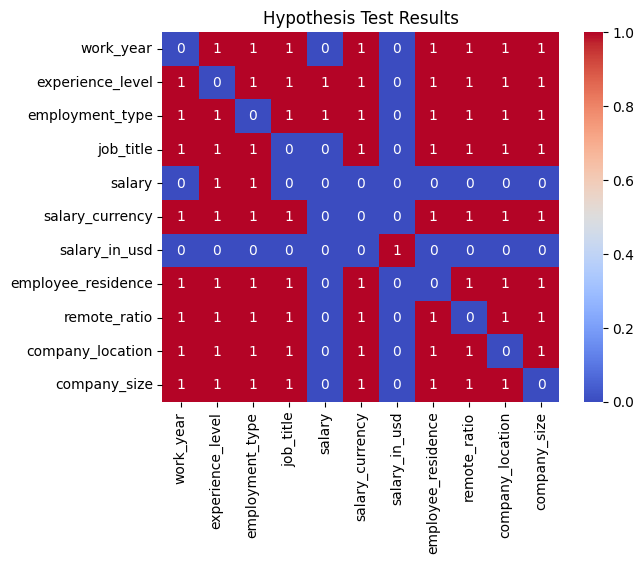

In [44]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

# **Data Visualization**

# **Preprocessing**

In [45]:
columns=['experience_level', 'employment_type', 'job_title',
       'salary_currency', 'employee_residence',
       'company_location', 'company_size']